**Plotting data as Bar Graphs**
- Just replacing the `plt.plot(...)` with `plt.bar(...)` will generate the bar graphs.

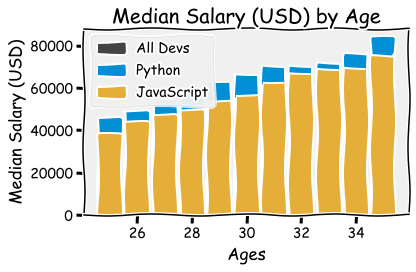

In [22]:
import numpy as np
from matplotlib import pyplot as plt

plt.xkcd()

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

plt.bar(ages_x, dev_y, color="#444444", label="All Devs")

py_dev_y = [45372, 48876, 53850, 57287, 63016,
             65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(ages_x, py_dev_y, color="#008fd5", label="Python")

js_dev_y = [37810, 43515, 46823, 49293, 53437,
             56373, 62375, 66674, 68745, 68746, 74583]
plt.bar(ages_x, js_dev_y, color="#e5ae38", label="JavaScript")

plt.legend()

plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

plt.tight_layout()



Here all the bars are overlapping over one another . Therefore i need to offset this explicitly by offsetting the bars by a distance. I use the indices and then offset either graphs by left and right by the distance = width of the bar.

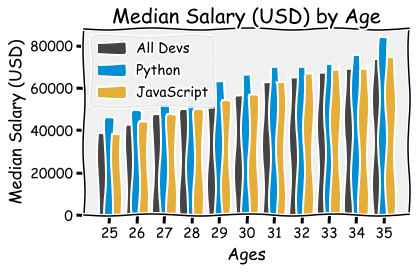

In [23]:
import numpy as np
from matplotlib import pyplot as plt

plt.xkcd()

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

#x_indices is an array with entries 0 - len(ages_x)
x_indexes = np.arange(len(ages_x))

#Explicitly entering the width
width = 0.25

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

plt.bar(x_indexes-width, dev_y,width=width, color="#444444", label="All Devs")

py_dev_y = [45372, 48876, 53850, 57287, 63016,
             65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(x_indexes, py_dev_y, width=width,color="#008fd5", label="Python")

js_dev_y = [37810, 43515, 46823, 49293, 53437,
             56373, 62375, 66674, 68745, 68746, 74583]
plt.bar(x_indexes+width, js_dev_y, width=width, color="#e5ae38", label="JavaScript")

plt.legend()

plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

#x-axis values - we should change from index to actual values - We neeed to fix this

plt.xticks(ticks = x_indexes,labels=ages_x)


plt.tight_layout()



<hr>

#### Importing Data from CSV file


We want to create a bar chart of most popular programming language people said they worked with

Let's grab the data from the CSV file. 
- Using CSV module from Standard Libraries (refer to the video uploaded by corey)
- readCSV() method from pandas (faster way)
- loadtxt() method from Numpy



We need to keep a count of languages for to be able to plot 
1. Keeping a list and count them at end
2. Keep a dict and update the counts of the dictionary

Python has a built in class called `Counter()`

Let's just look at a quick example of how counter works

In [49]:
from collections import Counter

c = Counter(['Python',"JavaScript"])
c.update(['C++',"Python"])
c.update(['C++',"Python",'JavaScript'])
c

Counter({'Python': 3, 'JavaScript': 2, 'C++': 2})

In [81]:
import csv
import numpy as np
from matplotlib import pyplot as plt

plt.xkcd()

with open('data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    row = next(csv_reader)
    print(row['LanguagesWorkedWith'])
    
    

HTML/CSS;Java;JavaScript;Python


To create a list of the entries from above data splitting them at `;`

In [83]:
print(row['LanguagesWorkedWith'].split(';'))

['HTML/CSS', 'Java', 'JavaScript', 'Python']


In [84]:
from collections import Counter

with open('data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    language_counter = Counter()

    #Lets loop over all of the rows and update the counter with data within the list
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))


print(language_counter)             

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


In [85]:
#Generates a tuple of language and count of the first 15 most common entries
print(language_counter.most_common(15))

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


Now we need to split the Languages and Counts separately to individual lists to be able to plot the data.

Let's code for this

In [86]:
languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


Text(0, 0.5, 'Number of people Who Use')

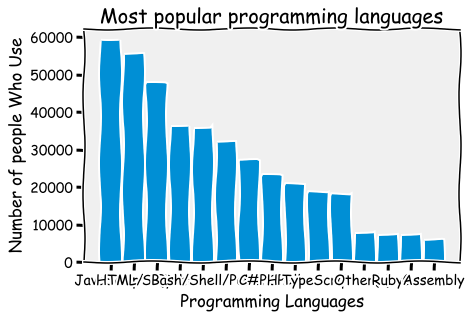

In [87]:
plt.bar(languages,popularity)

plt.title('Most popular programming languages')
plt.xlabel('Programming Languages')
plt.ylabel('Number of people Who Use')

#### Now Lets look at Horizontal Bar Graphs


When we have a lot of items then using horizontal bar would be more sensible. we can do this by changing the `plt.bar(...)` to `plt.barh(...)` . But we need to remember to enter y-axis values first and then x-values. Also,To reverse the entries we can apply the reverse method on the list .

`languages.reverse()`<br>
`popularity.reverse()`

These methods will apply to the lists in place so no need to assign it to the languages again.
``

Text(0.5, 0, 'Number of people Who Use')

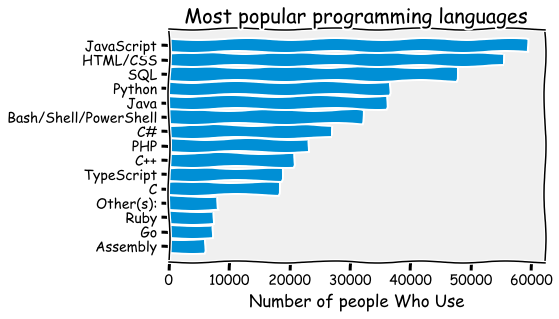

In [88]:
languages.reverse()
popularity.reverse()
plt.barh(languages,popularity)

plt.title('Most popular programming languages')
plt.xlabel('Number of people Who Use')

Lets look at how to import data from CSV using `Pandas`

In [89]:
import pandas as pd

In [90]:
data = pd.read_csv('data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))
